In [1]:
import pandas as pd

df = pd.read_csv("./census.csv")

In [2]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# The first thing we notice is that the column names have extra whitespace in them:

In [3]:
for col in df.columns:
    print(f"'{col}'")

'age'
' workclass'
' fnlgt'
' education'
' education-num'
' marital-status'
' occupation'
' relationship'
' race'
' sex'
' capital-gain'
' capital-loss'
' hours-per-week'
' native-country'
' salary'


# We can fix this quickly below:

In [4]:
rename_map = {col: col.strip() for col in df.columns}
df.rename(columns=rename_map, inplace=True)
for col in df.columns:
    print(f"'{col}'")

'age'
'workclass'
'fnlgt'
'education'
'education-num'
'marital-status'
'occupation'
'relationship'
'race'
'sex'
'capital-gain'
'capital-loss'
'hours-per-week'
'native-country'
'salary'


In [5]:
cleaned_data = "./census_CLEAN.csv"
df.to_csv(cleaned_data, index=False)

# If we look at the unique values in each column, we can also see there's extra whitespace in the categorical features

In [6]:
for col in df.columns:
    print(f"{col}={df[col].unique()}\n")

age=[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

workclass=[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlgt=[ 77516  83311 215646 ...  34066  84661 257302]

education=[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education-num=[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status=[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation=[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Mach

# First lets grab the categorical columns

In [7]:
cat_columns = [col for col in df.columns if df[col].dtype == 'object']
cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

# Then we can fix it below and re-save the cleaned data

In [8]:
for col in cat_columns:
    col_unique = df[col].unique().tolist()
    no_whitespace_map = {val: val.strip() for val in col_unique}
    df[col] = df[col].map(no_whitespace_map)

    print(f"{col}={df[col].unique()}\n")

workclass=['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education=['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status=['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation=['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship=['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race=['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex=['Male' 'Female']

native-country=['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'C

In [9]:
df.to_csv(cleaned_data, index=False)

# The categorical features look pretty good now. Lets check out the numerical features

In [10]:
num_columns = [col for col in df.columns if col not in cat_columns]
df[num_columns].describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# The distributions for capital-gain and capital-loss look very left-skewed. Lets plot some histograms to get a better look

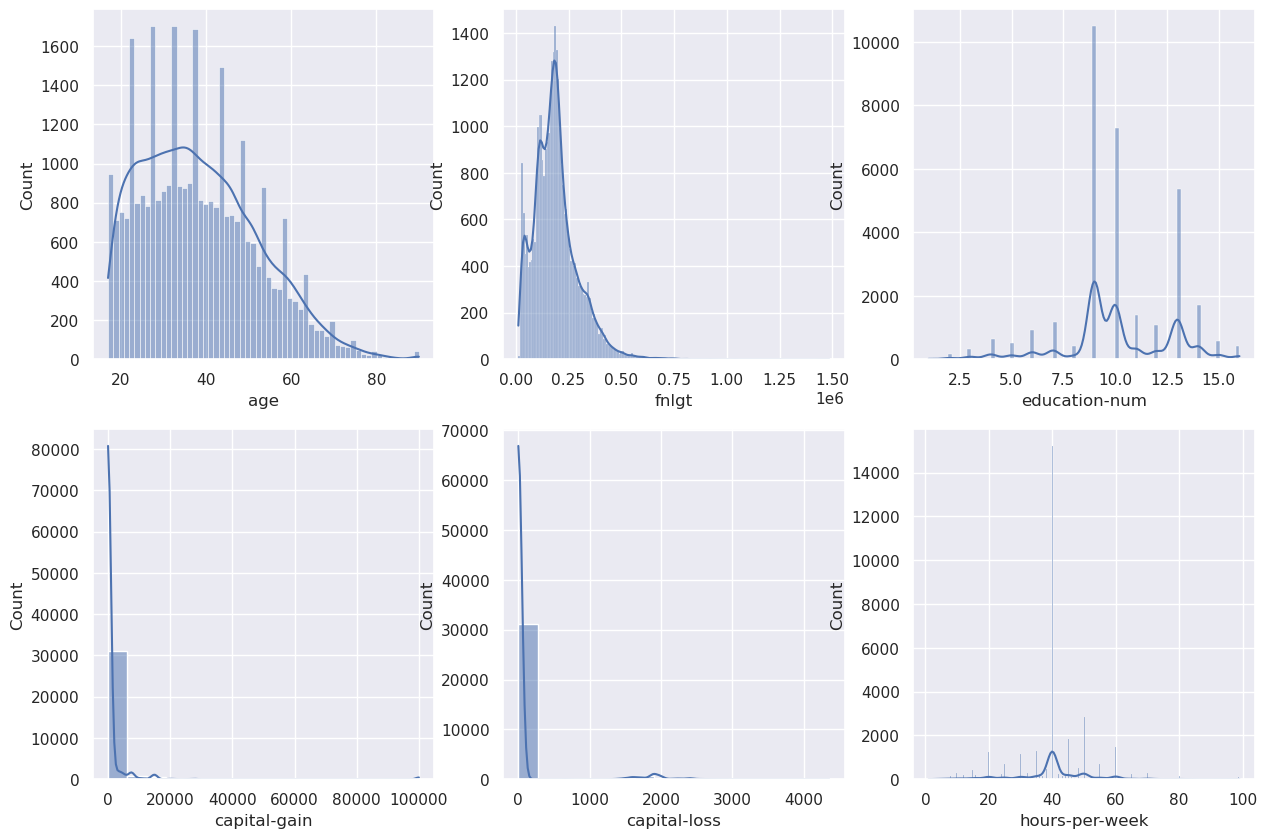

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="darkgrid")

# Make a grid of histograms
R = 2
C = 3
fig, axs = plt.subplots(R, C, figsize=(15, 10))

for i, col in enumerate(num_columns):
    r = i // C
    c = i % C
    sns.histplot(data=df[col].to_frame(), x=col, kde=True, ax=axs[r, c])

In [12]:
for col in ["capital-gain", "capital-loss"]:
    zeros_pct = len(df[df[col] == 0]) / len(df)
    print(f"{col} % zeros: {100*zeros_pct:.2f}")

capital-gain % zeros: 91.67
capital-loss % zeros: 95.33


# It looks like capital-gain and capital-loss might be worth leaving out when training the model considering they are almost always zero. We can train a model with and without them and compare feature importance, but it they end up truly not being useful we can remove them and make our model more efficient

# Lets also take a look at how many NaN's are in each column

In [13]:
for col in num_columns:
    print(f"{col}: {df[col].isna().sum()}")

age: 0
fnlgt: 0
education-num: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0


# Wow no NaN values, thats pretty good. We'll still probably want to add some data quality checks to make sure no NaN values make it into our model when its in production